In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

batch_size = 40
epochs = 15
EPOCHS = epochs
img_height = 224
img_width = 224

In [2]:
DIRECTORY = "./dataset"
CATEGORIES = ["su_kauke", "be_kaukes"]

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [3]:
# class_names = ds_train.class_names

baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224,224,3)))

for layer in baseModel.layers:
	layer.trainable = False
    
model = keras.Sequential([
    baseModel,
    layers.AveragePooling2D(pool_size=(7, 7)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(2, activation='sigmoid'),
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [4]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    batch_size=batch_size,
    epochs=10,
)

model.save("./model.h5", save_format="h5")

Epoch 1/10
28/28 [==============================] - 11s 96ms/step - loss: 0.1628 - binary_accuracy: 0.9355 - val_loss: 0.0342 - val_binary_accuracy: 0.9855
Epoch 2/10
28/28 [==============================] - 1s 42ms/step - loss: 0.0181 - binary_accuracy: 0.9918 - val_loss: 0.0259 - val_binary_accuracy: 0.9873
Epoch 3/10
28/28 [==============================] - 1s 41ms/step - loss: 0.0154 - binary_accuracy: 0.9936 - val_loss: 0.0136 - val_binary_accuracy: 0.9964
Epoch 4/10
28/28 [==============================] - 1s 42ms/step - loss: 0.0071 - binary_accuracy: 0.9982 - val_loss: 0.0142 - val_binary_accuracy: 0.9964
Epoch 5/10
28/28 [==============================] - 1s 40ms/step - loss: 0.0036 - binary_accuracy: 1.0000 - val_loss: 0.0144 - val_binary_accuracy: 0.9964
Epoch 6/10
28/28 [==============================] - 1s 38ms/step - loss: 0.0022 - binary_accuracy: 1.0000 - val_loss: 0.0139 - val_binary_accuracy: 0.9964
Epoch 7/10
28/28 [==============================] - 1s 39ms/step - lo

C:\Users\laimo\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Minimum Validation Loss: 0.0127


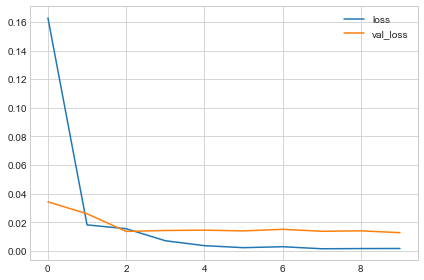

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))